## Module 5: Feature engineering

### Lesson 2: Gen AI in Python

### Part 5.2.1: Introduction to Gen AI in Python for Data science
- Generative AI and Large Language Models (LLMs) have brought a new dimension to Artificial Intelligence and Machine Learning. 
- These large language models are being used in various applications across different domains and have opened up new perspectives on AI. 
- These models are trained on a vast amount of text data from all over the internet and can generate text in a human-like manner. 
- The most well-known example of an LLM is ChatGPT, developed by OpenAI. 
- It can perform various tasks, from creating original content to writing code. 
- Here, we will discuss one of the applications of LLMs - the PandasAI librariy. 
- PandasAI can be considered as a combination of Pandas library and OpenAI’s GPT. 
- It is extremely powerful for getting quick insights from data without writing much code.

#### What is PandasAI?
- It is a new tool for making data analysis and visualization tasks easier.
- In Pandas, we have to analyze and manipulate data by writing appropriate code with the help of a bunch of in-built functions and methods. 
- On the other hand, PandasAI allows us to generate insights from data by simply providing a text prompt. 
- It is like giving some instructions to any fellow human, who will then be able to understand the execute the tasks assigned. 

#### Set up an OpenAI Account and Extract the API Key
- To use the PandasAI library, we must create an OpenAI account and use the API key. 
- It can be done as follows:
    - Go to https://platform.openai.com and create a personal account.
    - Sign in to your account.
    - Select **OpenAI** as the option that displayed on the screen.
    - Click on Personal on the top right side.
    - Select View API keys from the dropdown.
    - Create a new secret key.
    - Copy and store the secret key to a safe location on your computer.
    
#### Install PandasAI package
- Use the following command in jupyter notebook to install PandasAI:
        !pip install pandasai

**Arjun, demonstrate the procedure of selecting API key using your openai account**

### Part 5.2.2: Demonstration of PandasAI - Part I

In [7]:
# import the required libraries

import pandas as pd
from pandasai import PandasAI
#from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI

In [8]:
llm = OpenAI(api_token="07F7AA2GPT3")
pandas_ai = PandasAI(llm)

**Arjun, use your API key here. Also, we must instruct the post production team to blur your key**


In [9]:
# read the dataset
pos_data= pd.read_csv('POS_Data.csv')
pos_data.head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Unit_price,Units_sold,Page_traffic
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,NaN,0,0.0
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,NaN,0,0.0
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,NaN,0,0.0
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,NaN,0,0.0
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,NaN,0,0.0


**Let us perform some basic operations using appropriate prompt**

In [10]:
pandas_ai(pos_data, prompt='What is the size of the dataset?')

Incorrect API key provided: 07F7AA2GPT3. You can find your API key at https://platform.openai.com/account/api-keys.


'Unfortunately, I was not able to answer your question, because of the following error:\n\nIncorrect API key provided: 07F7AA2GPT3. You can find your API key at https://platform.openai.com/account/api-keys.\n'

**We can see the code generated internally to achieve this task, by giving additional parameter:**

In [ ]:
pandas_ai(pos_data, prompt='What is the size of the dataset?',show_code= True)

In [ ]:
df.shape

In [ ]:
#The following code is generated by pandas_ai when you run the above code cell.
#We can change the dataframe name, if we want to modify the code. 


# df.shape  

In [ ]:
pandas_ai(pos_data, prompt='List out the information about the dataset')

In [ ]:
pandas_ai(pos_data, prompt='Are there any missing values in the data?')

#### Prompts to extract more complex information:
- Let us design our prompts to extract complex information from the data. 
- Using Pandas, we would have used methods like *groupby()* and some aggregation functions to achieve these tasks. 
- However, using PandasAI, we just need to use appropriate prompt.

In [ ]:
pandas_ai(pos_data, prompt='Which sector has highest revenue?')

If we use *show_code=True* in the above code, we will get the following code:
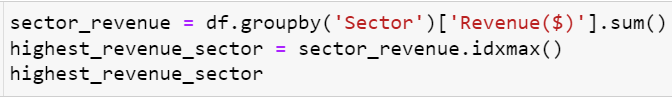

**Arjun, you can show it by actually using show_code parameter. For the reference, I have added the image here, and not saved the image in the drive, as you can get it by yourself**

In [ ]:
pandas_ai(pos_data, prompt='Which brand has highest revenue? And how much?')

In [ ]:
pandas_ai(pos_data, prompt='List out average sales for each category')  

- Note that, the PandasAI is considering units sold column, but not revenue, when we use the prompt as 'average sales'.
- So, use appropriate term in the prompt so that we will get what we want.

In [ ]:
#so, use revenue as the term
pandas_ai(pos_data, prompt='List out average revenue for each category')

In [ ]:
pandas_ai(pos_data, prompt='List out the brands whose average revenue is more than 15000')

In [ ]:
pandas_ai(pos_data, prompt='List out average revenue for each category, separated by each sector')

**We can give multiple sentences in the prompt to indicate what exactly we want. It is just like we giving some specific instructions to other person with more details and to get better results.**

**Arjun, in the following prompt, please show the result by keeping just one sentence, then two sentences, then 3 and so on. And hence demonstrate how we can put our results in a better way and to indicate how the LLM internally takes our instrutions. This also indicates the power of right prompts. For example, if you remove the sentence about sorting, the result will not be sorted. If you don't ask to round off, there will be 6 digits after decimal point. 
I actually kept adding sentences to this one prompt to see the progressive result**

In [ ]:
pandas_ai(pos_data, prompt='List out average revenue for each brand, separated by each category. \
                            And sort them from highest to lowest. Round off the revenue for 2 decimal points. \
                            Rearrange the row numbers from 1')

### Part 5.2.2: Demonstration of PandasAI - Part II
- In this lecture, let us try using the prompts to generage graphs.

In [ ]:
#bar plot
pandas_ai(pos_data, prompt='draw a barplot showing the revenue of all the sectors\
                            keep the graph size as 6 by 4')

In [ ]:
pandas_ai(pos_data, prompt='draw a histogram with kde curve showing the page traffic\
                            keep the graph size as 6 by 4 ')

In [ ]:
pandas_ai(pos_data, prompt='display Boxplot showing page traffic across categories.\
                             keep the graph size as 10 by 8')

In [ ]:
pandas_ai(pos_data, prompt='display scatter plot of revenue versus page traffic')

In [ ]:
#dropping a column
pandas_ai(pos_data, prompt='drop the unit price column from the dataset')
pos_data.head()

#### Concluding remarks
- GenAI is an advancement in the field of AI and it is evolving very fast.
- The PandasAI package also has evolved into multiple versions as of now.
- We have used the version 0.7.2 in this lecture, which was released in July 2023.
- However, at the time of creating this course (Sept 2023), a latest version 1.2.6 is released.
- The latest version comes up with new options like `SmartDataFrame`, `SmartDataLake` etc. to have a better interaction with OpenAI and to produce better results.
- The new version also has functions like `clean_data`, `impute_missing_values`, `generate_features` etc. to clean the data, to impute the missing values, to implement feature engineering and so on.
- However, these functions are very premature in nature as of now, and are capabale of solving very standard problems like imputing the missing values by mean. It do not have capability to understand the relationship between the attributes (how we had in our POS data) and then to impute.
- So, the learner may observe more updates on PandasAI in upcoming days.
- Anyone interested, can follow the following documentation page:
https://pypi.org/project/pandasai/